Predicting the insurance price using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the insurance price.

# 1. Problem definition
> How well can we predict the future sale price of a insurance, given its characteristics and previous examples of how much similar insurance have sold for?
# 2 . Data
The data is downloaded from kaggle Bluebook for insurance :

There are 3 main datasets :

Train.csv is the training set, which contains data through the end of 2011. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note : The goal for most regression evaluation metrics to minimize the error. For example,

# 4. Features
kaggle provides a data dictionary detailling of all the features of the datasets. You can view this data dictionary

In [1]:
## Importing Tools for preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For splitting dataset
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# for evaluation of model
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Reading dataset with the help of pandas
ins = pd.read_csv('insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
len(ins)

1338

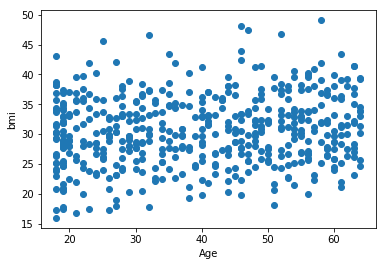

In [7]:
fig, ax = plt.subplots()
ax.scatter(ins['age'][: 500],ins['bmi'][: 500])
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()

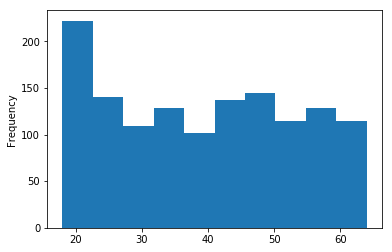

In [8]:
ins.age.plot.hist(bins=10)

In [9]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df_ins = ins.copy()
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [11]:
# This function will help in selecting unique values in dataset
df_ins.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [12]:
# Find the coulumn with string
for label, content in df_ins.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

sex
smoker
region


In [13]:
# This will turn all the string into categories
for label,content in df_ins.items():
    if pd.api.types.is_string_dtype(content):
        df_ins[label] = content.astype('category').cat.as_ordered()

In [14]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [15]:
# Export data to new csv 
df_ins.to_csv('ins.csv')

In [16]:
# Import data 
df_ins = pd.read_csv('ins.csv')

In [17]:
df_ins.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


Now we'll have to check which of the following is not numeric


In [18]:
for label,content in df_ins.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

sex
smoker
region


In [19]:
df_ins= df_ins.drop('Unnamed: 0', axis=1)

In [20]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
for label,content in df_ins.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_ins[label] = pd.Categorical(content).codes+1

In [22]:

df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,4,16884.92400
1,18,2,33.770,1,1,3,1725.55230
2,28,2,33.000,3,1,3,4449.46200
3,33,2,22.705,0,1,2,21984.47061
4,32,2,28.880,0,1,2,3866.85520


In [23]:
# Now we'll have to split the data into x and y
x = df_ins.drop('charges',axis=1)
y = df_ins['charges']

In [24]:
x.shape , y.shape

((1338, 6), (1338,))

In [25]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,4,16884.92400
1,18,2,33.770,1,1,3,1725.55230
2,28,2,33.000,3,1,3,4449.46200
3,33,2,22.705,0,1,2,21984.47061
4,32,2,28.880,0,1,2,3866.85520


In [26]:
np.random.seed(42)
df_ins = shuffle(df_ins)
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
764,45,1,25.175,2,1,1,9095.06825
887,36,1,30.020,0,1,2,5272.17580
890,64,1,26.885,0,2,2,29330.98315
1293,46,2,25.745,3,1,2,9301.89355
259,19,2,31.920,0,2,2,33750.29180


In [27]:
# Now splitting data for trainig and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [29]:
## Choosing machine learning model by experimenting  

models = {'RandomForest': RandomForestRegressor(),
          'Decision Tree': DecisionTreeRegressor(),
          'Linear Regression': LinearRegression()
         }
model_score = {}

for name,model in models.items():
    model.fit(x_train,y_train)
    model_score[name] = model.score(x_test,y_test)
    
    y_pred = model.predict(x_test)
    
    
    model_score[name+'MAE'] = mean_absolute_error(y_test,y_pred)
    model_score[name+'MSE'] = mean_squared_error(y_test,y_pred),
    model_score[name+'R2']= r2_score(y_test,y_pred)

    

C:\Users\amarj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
model_score

{'RandomForest': 0.8272726917736462,
 'RandomForestMAE': 2381.8014611750004,
 'RandomForestMSE': (22050056.155691657,),
 'RandomForestR2': 0.8272726917736462,
 'Decision Tree': 0.7479430102151248,
 'Decision TreeMAE': 2471.7759602947767,
 'Decision TreeMSE': (32177140.003291655,),
 'Decision TreeR2': 0.7479430102151248,
 'Linear Regression': 0.7406726419811065,
 'Linear RegressionMAE': 3920.53250579772,
 'Linear RegressionMSE': (33105262.078942683,),
 'Linear RegressionR2': 0.7406726419811065}

In [31]:
# Now tuning our model for hyperparameter tuning
rs_grid= {'n_estimators':np.arange(10,100,10),
          'max_depth': [None, 3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2),
          'max_features': [0.5,1,'sqrt','auto'],
          }

# Instantiate Randomized search cv
rs_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                           param_distributions=rs_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit the Randomized Search cv
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]), 'max_depth': [None, 3, 5, 10], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_features': [0.5, 1, 'sqrt', 'auto']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_features': 'auto',
 'max_depth': 5}

In [33]:
rs_rf.score(x_test,y_test)

0.8596276071984623

In [34]:
#Most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators= 70,
                                    min_samples_split= 2,
                                    min_samples_leaf= 11,
                                    max_features='auto',
                                    max_depth= 5)

ideal_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
a = 3
b =3
c = 4
d =3
e=7
f=3
ls = [a,b,c,d,e,f]
test = pd.DataFrame(ls).T

In [40]:
test

,0,1,2,3,4,5
0,3,3,4,3,7,3


In [41]:
y_pred = ideal_model.predict(test)

In [44]:
y_pred = np.array_str(y_pred)

In [46]:
type(y_pred)

str

In [ ]:
ideal_model.feature_importances_

In [ ]:
def plot_features(columns, importances, n=20):
    df= (pd.DataFrame({'features':columns,
                       'feature_importances': importances})
        .sort_values('feature_importances',ascending=False)
        .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.invert_yaxis()
     

In [ ]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [ ]:
import pickle

In [ ]:
pickle.dump(ideal_model, open('ins.pkl','wb'))